In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import inspect
from collections import Counter

import matplotlib.pyplot as plt

In [ ]:
WATERloc = "/content/drive/MyDrive/FIRST-SEMESTER/ML/TEAM-WORK/WATER/DATA/" + "COSTERO.xlsb"


In [ ]:
WATER = pd.read_excel(WATERloc)
WATER.replace('<', '', regex=True, inplace=True)
COLS = WATER.columns

In [ ]:
# Do we have repeated keys?
FREQclave = WATER.iloc[:, 0].value_counts()
FREQclave[FREQclave>1]


Series([], Name: count, dtype: int64)

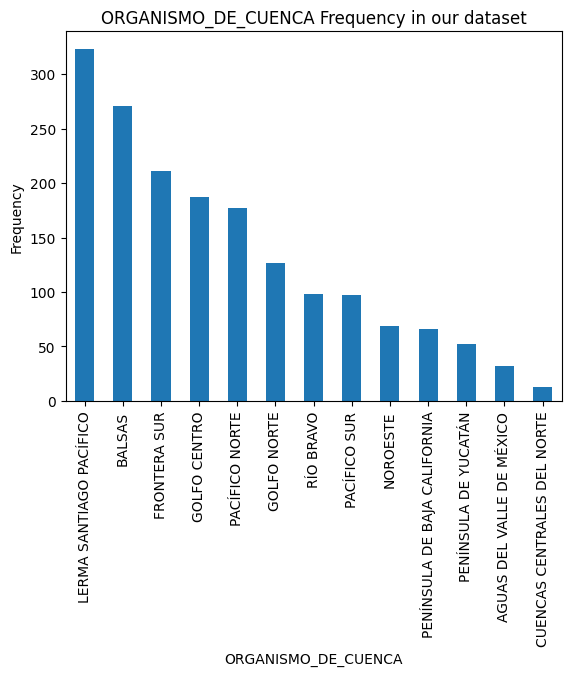

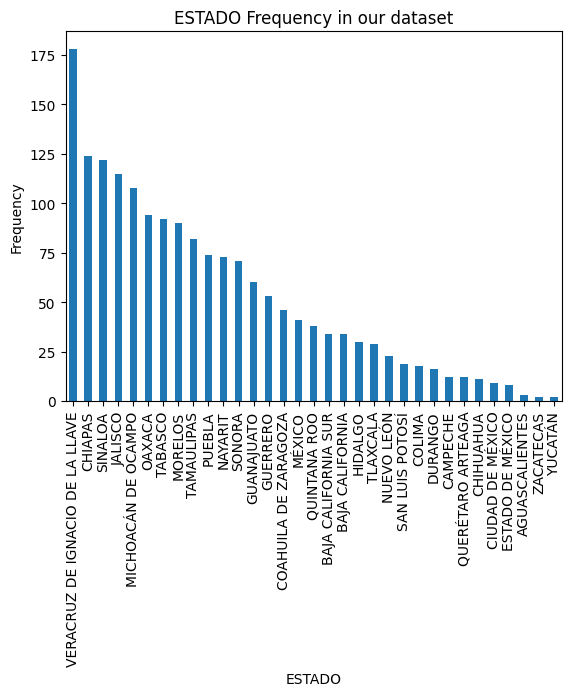

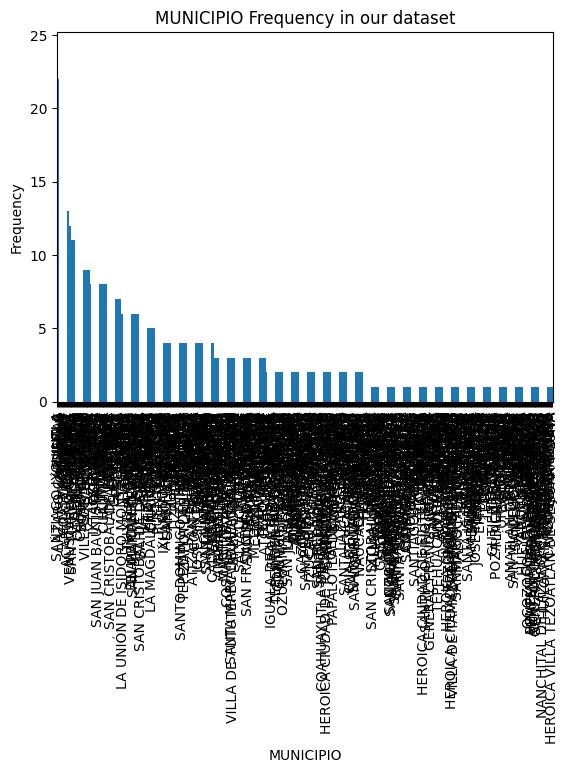

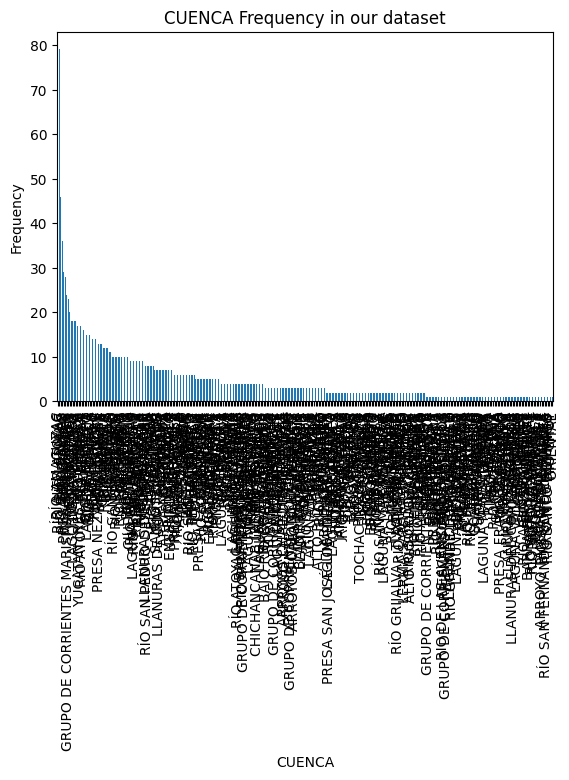

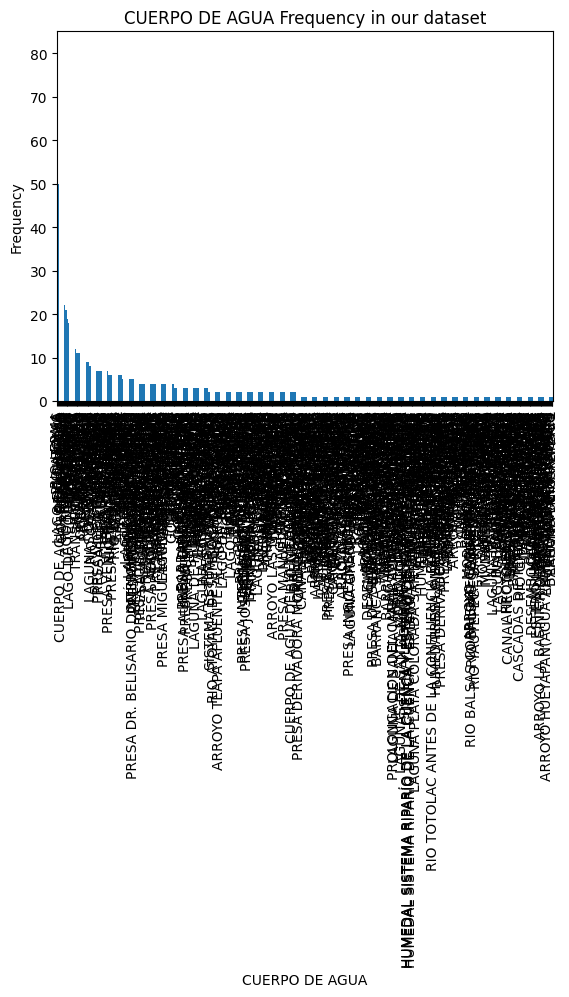

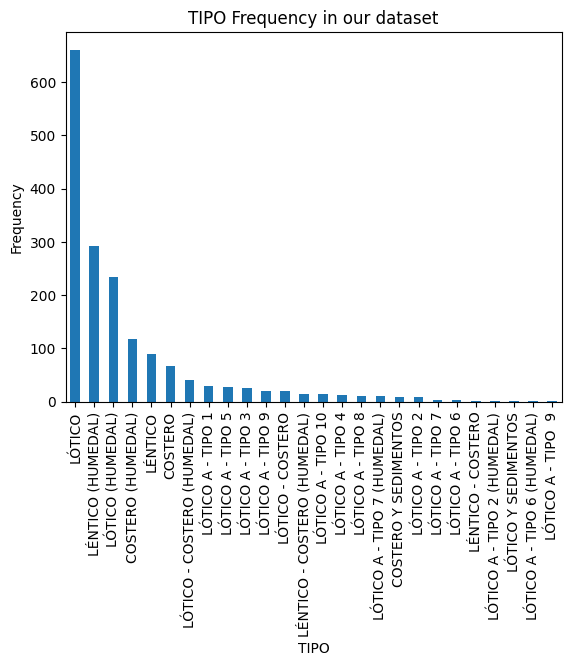

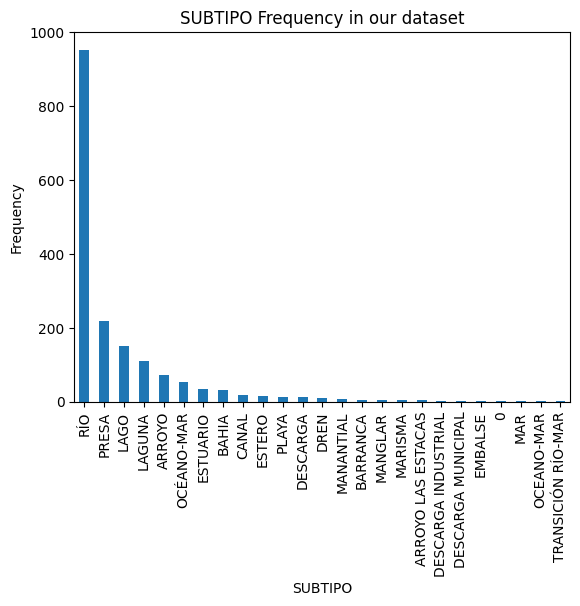

In [ ]:



# List of columns to evaluate
COLSloc = WATER.columns[range(2,9)]

# Initialize a dictionary to store the frequencies of each column
FREcol = {}

# Calculate the frequency of each string in each column
for COL in COLSloc:
    FREcol[COL] = WATER[COL].value_counts()

# Plot a barplot for each column
for COL, FREQ in FREcol.items():
    FREQ.plot(kind='bar')
    plt.xlabel(COL)
    plt.ylabel('Frequency')
    plt.title(f'{COL} Frequency in our dataset')
    plt.show()


['yellow', 'red', 'green']


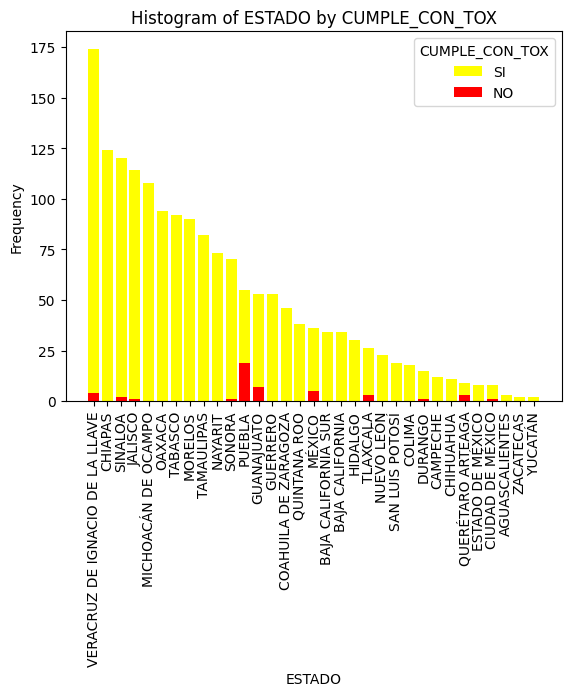

In [ ]:


def plot_histogram(df, category_col, vars_col):
    """
    Plot a histogram based on unique values in the category column.

    Parameters:
        df (DataFrame): The pandas DataFrame.
        category_col (str): The name of the category column.
        vars_col (str): The name of the variables column.
    """
    # Get unique values in the category column
    unique_categories = df[category_col].unique()

    # Set up colors for bars
    colors = ['yellow', 'red', 'green']#plt.cm.viridis_r(range(len(unique_categories)))
    print(colors)

    # Plot histogram for each unique category
    for i, category in enumerate(unique_categories):
        # Filter data for the current category
        category_data = df[df[category_col] == category][vars_col]

        # Calculate frequency of each unique value in the variable column
        freq = category_data.value_counts()

        # Plot the histogram
        plt.bar(freq.index, freq.values, color=colors[i], label=category)

    # Customize plot
    plt.xlabel(vars_col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {vars_col} by {category_col}')
    plt.legend(title=category_col)
    plt.xticks(rotation=90)

    plt.show()

# Example usage
# Suppose 'df' is your DataFrame, 'CATEGORY' is the category column, and 'VARS' is the variables column
plot_histogram(WATER, 'CUMPLE_CON_TOX', 'ESTADO')


In [ ]:
WATER[(WATER["ESTADO"] == 'GUANAJUATO') & (WATER['CUMPLE_CON_TOX'] =="NO")]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
167,DLGUA1049,RT-9 RIO TURBIO-PUENTE RIO TURBIO (T. BLANCAS),LERMA SANTIAGO PACÍFICO,GUANAJUATO,MANUEL DOBLADO,RÍO LERMA 5,RIO TURBIO,LÓTICO A - TIPO 8,RÍO,-101.704360,...,"DBO,DQO,SST,CF,E_COLI,OD%L,TOX_L,",NO,NO,NO,NO,NO,ND,NO,NO,LOTICO
168,DLGUA1061,RT-4 RIO TURBIO-ESTANCIA DE VAQUEROS,LERMA SANTIAGO PACÍFICO,GUANAJUATO,LEÓN,RÍO TURBIO,RIO TURBIO,LÓTICO A - TIPO 8,RÍO,-101.761180,...,"DBO,DQO,SST,CF,E_COLI,OD%L,TOX_L,",NO,NO,NO,NO,NO,ND,NO,NO,LOTICO
169,DLGUA1062,AF-3 ARROYO HONDO-A.A. RIO TURBIO,LERMA SANTIAGO PACÍFICO,GUANAJUATO,LEÓN,RÍO TURBIO,RIO TURBIO,LÓTICO A - TIPO 8,RÍO,-101.730970,...,"DBO,DQO,SST,CF,E_COLI,OD%L,TOX_L,",NO,NO,NO,NO,NO,ND,NO,NO,LOTICO
172,DLGUA1068W1,LEON (A) AGUAS ABAJO,LERMA SANTIAGO PACÍFICO,GUANAJUATO,LEÓN,RÍO TURBIO,ARROYO LAS MULAS/RIO TURBIO,LÓTICO,RÍO,-101.729780,...,"DBO,DQO,SST,CF,E_COLI,OD%L,TOX_L,",NO,NO,NO,NO,NO,ND,NO,NO,LOTICO
174,DLGUA1079,RT-6 RIO TURBIO-PASO DE OVEJAS,LERMA SANTIAGO PACÍFICO,GUANAJUATO,SAN FRANCISCO DEL RINCÓN,RÍO TURBIO,RIO TURBIO,LÓTICO A - TIPO 8,RÍO,-101.844920,...,"DBO,DQO,SST,CF,E_COLI,OD%L,TOX_L,",NO,NO,NO,NO,NO,ND,NO,NO,LOTICO
176,DLGUA1138,RIO GUANAJUATO,LERMA SANTIAGO PACÍFICO,GUANAJUATO,IRAPUATO,RÍO LERMA 5,RIO GUANAJUATO,LÓTICO A - TIPO 9,RÍO,-101.330833,...,"DBO,DQO,CF,E_COLI,OD%L,TOX_L,",NO,NO,SI,NO,NO,ND,NO,NO,LOTICO
209,DLGUA962,RT-7 BIS CANAL ISABELOTA EN MARAVILLAS,LERMA SANTIAGO PACÍFICO,GUANAJUATO,MANUEL DOBLADO,RÍO TURBIO,RIO TURBIO,LÓTICO A - TIPO 8,RÍO,-101.898610,...,"DBO,DQO,CF,E_COLI,TOX_L,",NO,NO,SI,NO,NO,ND,ND,NO,LOTICO


<class 'numpy.dtypes.ObjectDType'>


AttributeError: Rectangle.set() got an unexpected keyword argument 'kind'

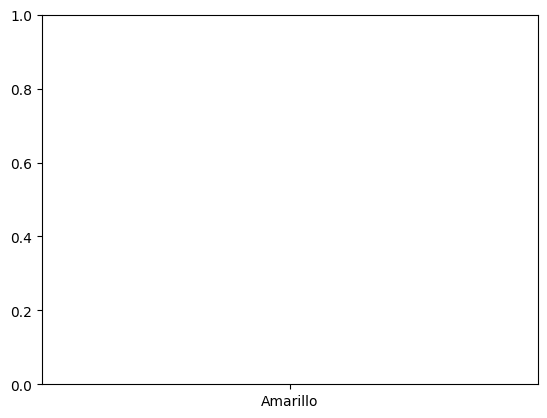

In [ ]:
def HISTbyCAT(DATA, CATS, VAR):
  CATEGORIES = set(DATA[CATS])
  for C in CATEGORIES:
    FILTERED = DATA.loc[DATA[CATS] == C, VAR]
    print(type(FILTERED.dtypes))


    # Initialize a dictionary to store the frequencies of each column
    FREQ = FILTERED.value_counts()


    plt.bar(FREQ.index, FREQ, kind='bar', alpha=0.8)
  plt.xlabel(COL)
  plt.ylabel('Frequency')
  plt.title(f'{COL} Frequency in our dataset')
  plt.show()


HISTbyCAT(WATER, COLS[2], 'SEMAFORO')

In [ ]:
WATER.iloc[:,12]

0          2
1          2
2        112
3        5.5
4        NaN
        ... 
1718       2
1719       2
1720       2
1721    6.72
1722     4.4
Name: DBO_mg/L, Length: 1723, dtype: object

In [ ]:
def HISTbyCATEGORY(COUNTS, FEATURE = "words", COLUMN = "abstract", RANGE = False, MIN = 0, MAX = 300, BIN=10):
  plt.figure(figsize=(10, 6))
  for i in range(NUMcate):
    TOPIC = CATEGORIES[i]
    WCtopic = COUNTS[COUNTS[TOPIC] == 1]["WC"]
    if RANGE:
      MIN = min(COUNTS["WC"])
      MAX = max(COUNTS["WC"])

    plt.hist(WCtopic, bins=range(MIN, MAX + 1, BIN), alpha=0.8, label = f'{TOPIC}: {FREQ[i]} records')  # Use different colors for each category

  plt.title(f'Frequency of word {FEATURE} for each topic in the {COLUMN}')
  plt.xlabel(f'Word {FEATURE}')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

def D2plot(VECT, DF, DATASETname="Training", NOTES="1-gram", CATEGORIES=CATEGORIES):
  COL = ["blue", '#FF8902']
  plt.figure(figsize=(10, 5))
  for i, TOPIC in enumerate(CATEGORIES):
    for j, C in enumerate([0,1]):
      IDinterest = DF[TOPIC] == C
      plt.scatter(VECT[IDinterest, 0], VECT[IDinterest, 1], color=COL[j], marker='.', alpha=0.5, label = C)
      plt.title(f'{TOPIC} records by class using {DATASETname} dataset: {NOTES}')
      plt.legend()
    plt.show()